In [127]:
import pandas as pd

Read Data .csv


In [128]:
#encoding = menangani file berbeda format dan latin = alias
songs= pd.read_csv('/content/top50.csv', encoding = "latin-1")

In [129]:
songs.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [130]:
#menampilkan 5 data terbawah
songs.tail()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
45,46,One Thing Right,Marshmello,brostep,88,62,66,-2,58,44,182,7,5,88
46,47,Te Robaré,Nicky Jam,latin,176,75,67,-4,8,80,202,24,6,88
47,48,Happier,Marshmello,brostep,100,79,69,-3,17,67,214,19,5,88
48,49,Call You Mine,The Chainsmokers,edm,104,70,59,-6,41,50,218,23,3,88
49,50,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12,82


Data Exploring and Data Cleaning

In [131]:
#untuk menampilkan jumlah baris dan kolom
songs.shape

(50, 14)

In [132]:
#untuk melihat apakah ada data duplikat
songs.duplicated().sum()

0

In [133]:
#melihat jumlah missing value yang ada di dalam dataset
songs.isna().sum()

Unnamed: 0          0
Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64

In [134]:
#untuk melihat detail informasi kolom dan tipe data
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [135]:
#mengubah nama kolom
songs.rename(columns={'Unnamed: 0':'No','Track.Name':'Track_name','Artist.Name':'Artist_name','Beats.Per.Minute':'Beats_per_minute',
                      'Loudness..dB..':'Loudness(db)','Valence.':'Valence','Length.':'Length','Acousticness..':'Acousticness','Speechiness.':'Speechiness'},inplace=True)
songs.head()

,No,Track_name,Artist_name,Genre,Beats_per_minute,Energy,Danceability,Loudness(db),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


Top Artist in 2019

In [136]:
#menampilkan informasi 10 top artis
songs['Count']=1
songs_artist=songs.groupby('Artist_name')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)
songs_artist.head(10)

,Artist_name,Count
9,Ed Sheeran,4
19,Lil Nas X,2
32,Shawn Mendes,2
25,Marshmello,2
28,Post Malone,2
31,Sech,2
10,J Balvin,2
34,The Chainsmokers,2
4,Billie Eilish,2
2,Ariana Grande,2


Popularity Song

In [137]:
#menampilkan 3 lagu berdasarkan popularity
songs.sort_values('Popularity', ascending=False).head(3)

,No,Track_name,Artist_name,Genre,Beats_per_minute,Energy,Danceability,Loudness(db),Liveness,Valence,Length,Acousticness,Speechiness,Popularity,Count
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95,1
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,1
10,11,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93,1


Genre

In [138]:
#menampilkan top genre
songs_genre=songs.groupby('Genre')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)
songs_genre.head(3)

,Genre,Count
8,dance pop,8
15,pop,7
13,latin,5


Top 10 Songs in 2019

In [139]:
#menampilkan top lagu berdasarkan popularity
top_songs=songs.sort_values(by='Popularity',ascending=False).head(10).reset_index(drop=True)
top_songs

,No,Track_name,Artist_name,Genre,Beats_per_minute,Energy,Danceability,Loudness(db),Liveness,Valence,Length,Acousticness,Speechiness,Popularity,Count
0,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95,1
1,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,1
2,11,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93,1
3,15,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83,-4,12,10,205,10,5,92,1
4,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,1
5,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92,1
6,37,Otro Trago,Sech,panamanian pop,176,70,75,-5,11,62,226,14,34,91,1
7,22,Panini,Lil Nas X,country rap,154,59,70,-6,12,48,115,34,8,91,1
8,21,Piece Of Your Heart,MEDUZA,pop house,124,74,68,-7,7,63,153,4,3,91,1
9,20,Truth Hurts,Lizzo,escape room,158,62,72,-3,12,41,173,11,11,91,1


Data Visualisation

In [140]:
#mendefinisikan genre
genre = songs.Genre.value_counts()
genre

dance pop           8
pop                 7
latin               5
edm                 3
canadian hip hop    3
reggaeton flow      2
dfw rap             2
electropop          2
canadian pop        2
reggaeton           2
country rap         2
brostep             2
panamanian pop      2
r&b en espanol      1
australian pop      1
trap music          1
atl hip hop         1
big room            1
pop house           1
boy band            1
escape room         1
Name: Genre, dtype: int64

In [141]:
#membuat chart menggunakan data yang terdapat di genre
import plotly.express as px
fig = px.pie(labels=genre.index, 
             values=genre.values,
             title='Genre',
             names=genre.index,
             hole=0.6)
fig.update_traces(textposition='inside',textinfo='percent+label',textfont_size=15)
fig.show()

In [142]:
#mendefinisikan nama artis
songs.Artist_name.value_counts()

Ed Sheeran          4
Billie Eilish       2
J Balvin            2
Shawn Mendes        2
Ariana Grande       2
The Chainsmokers    2
Sech                2
Lil Nas X           2
Marshmello          2
Post Malone         2
Sam Smith           1
Lizzo               1
Young Thug          1
Taylor Swift        1
Lil Tecca           1
Daddy Yankee        1
Khalid              1
Lewis Capaldi       1
Y2K                 1
Maluma              1
Chris Brown         1
Martin Garrix       1
Tones and I         1
Lady Gaga           1
ROSALÍA             1
Lunay               1
Katy Perry          1
DJ Snake            1
Drake               1
MEDUZA              1
Nicky Jam           1
Lauv                1
Jhay Cortez         1
Kygo                1
Ali Gatie           1
Jonas Brothers      1
Anuel AA            1
Bad Bunny           1
Name: Artist_name, dtype: int64

In [143]:
#menampilkan bar chart menngunakan data yang ada di artist_name
Artist = songs.Artist_name.value_counts()
v_bar = px.bar(
    x = Artist.index,
    y = Artist.values,
    color = Artist.values,
    color_continuous_scale='earth',
    title='TOP 50 Artist in 2019'
)
v_bar.update_layout(xaxis_title='Artist Name', 
                    coloraxis_showscale=False,
                    yaxis_title='Count')
v_bar.show()

In [144]:
fig = px.pie(songs,names='Artist_name',values='Popularity', title='Precentase Artis dengan Popularitas')
fig.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 147 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 148 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 147 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 148 missing from current font.



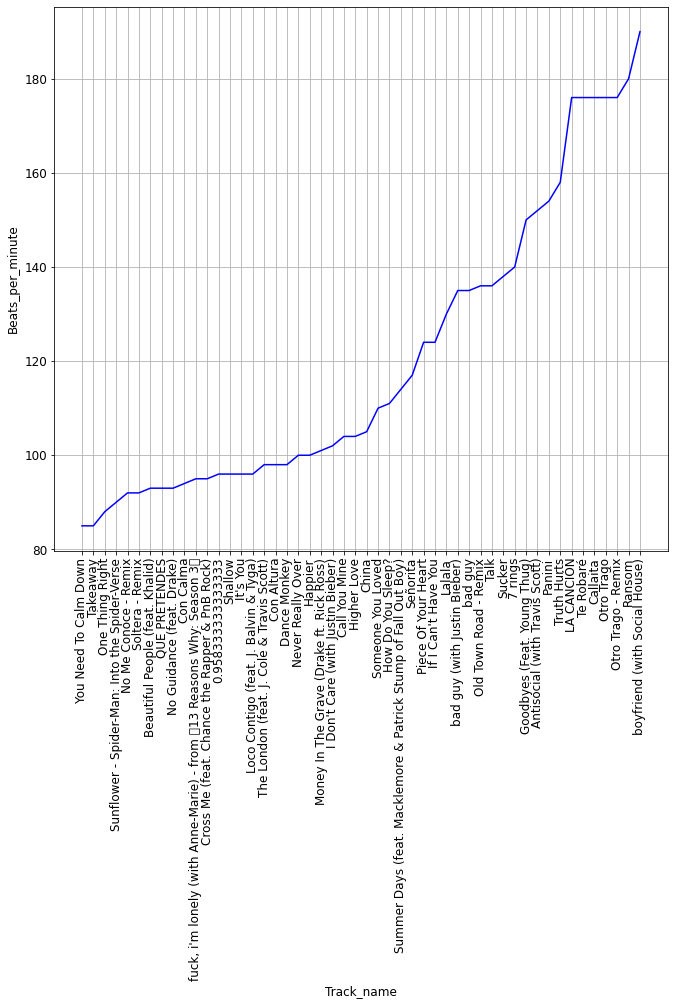

In [145]:
import matplotlib.pyplot as plt
Track_BPM = (songs.groupby("Track_name",as_index=False)['Beats_per_minute'].mean().sort_values("Beats_per_minute")).reset_index(drop=True)
Track_BPM

plt.figure(figsize=(11,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(Track_BPM['Track_name'],Track_BPM['Beats_per_minute'],color='blue')
plt.grid()
plt.xlabel('Track_name', fontsize=12)
plt.ylabel('Beats_per_minute', fontsize=12)
plt.xticks(rotation=90)
plt.show()